In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


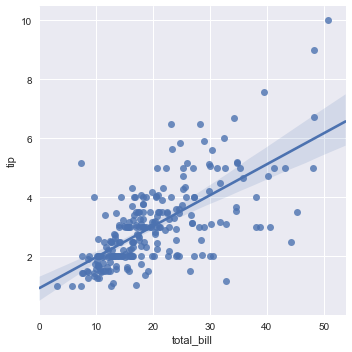

In [3]:
sns.lmplot(x='total_bill',y='tip',data=tips)

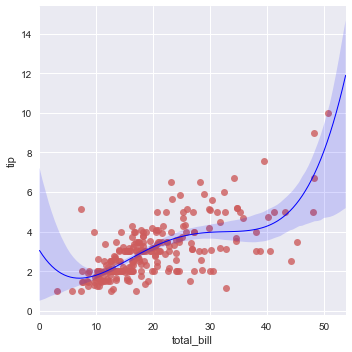

In [5]:
sns.lmplot("total_bill","tip",tips, order=4,    # `order=1` by default
                   scatter_kws={"marker":"o", "color":"indianred"},
                    line_kws={"linewidth":1,"color":"blue"})

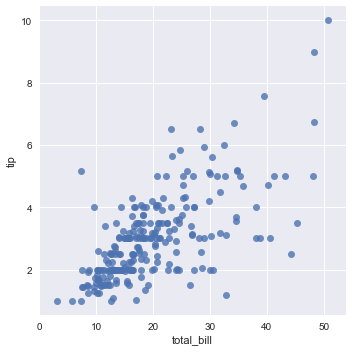

In [7]:
sns.lmplot("total_bill","tip",tips,fit_reg=False)

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
# `lmplot()` also works in discrete variables
tips["tip_pect"] = 100*(tips["tip"]/tips["total_bill"])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


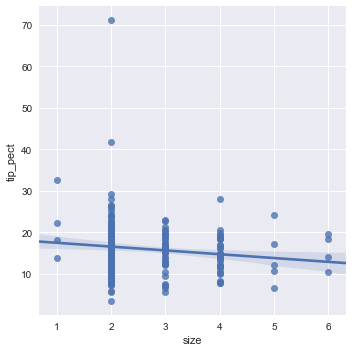

In [11]:
sns.lmplot("size","tip_pect",tips)

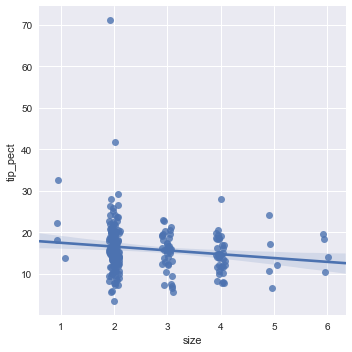

In [13]:
# add jitter to aviod overlapping of points
sns.lmplot("size","tip_pect",tips,x_jitter=.1)

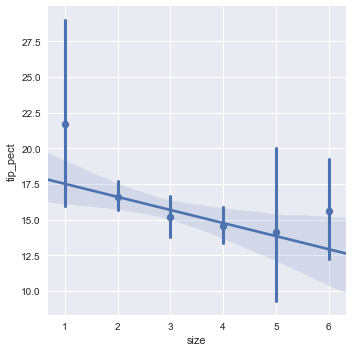

In [14]:
# We can also estimate the tendency of each bin (size of party in this case)
sns.lmplot("size","tip_pect",tips,x_estimator=np.mean)

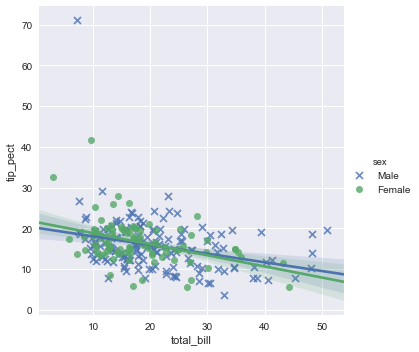

In [15]:
sns.lmplot("total_bill","tip_pect",tips, hue="sex",markers=["x","o"])  # two lm models

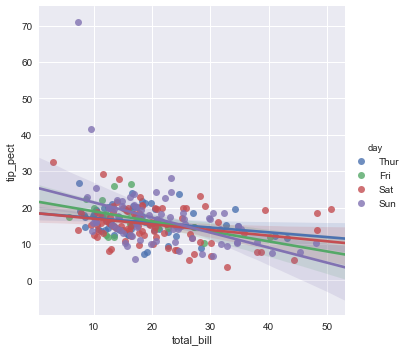

In [16]:
sns.lmplot("total_bill","tip_pect",tips,hue="day")

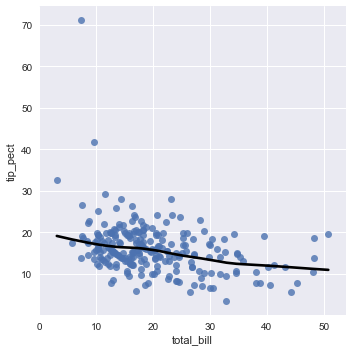

In [29]:
# Finally it should be noted that Seabron supports Local Regression (LOESS) model fitting
url = 'http://en.wikipedia.org/wiki/Local_regression'

sns.lmplot("total_bill","tip_pect",tips, lowess=True,line_kws={"color":"black"})

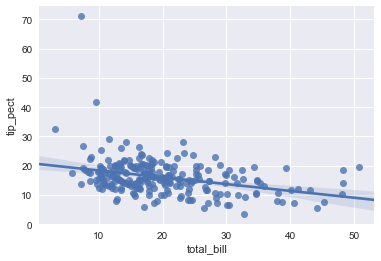

In [30]:
# The lmplot() we've been using is actually using a lower-level function, regplot()
## regplot is the lower-level function that lmplot was built on top of 
sns.regplot("total_bill","tip_pect",tips)

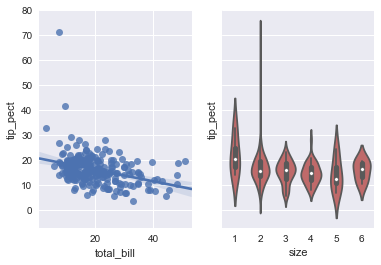

In [40]:
# reg_plot can be added to existing axes without modifying anything in the figure
fig,(axis1,axis2) = plt.subplots(nrows=1,ncols=2,sharey=True)
sns.regplot("total_bill","tip_pect",tips,ax=axis1)
sns.violinplot(tips["size"],tips["tip_pect"],color="indianred",ax=axis2)